In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
churn_data=pd.read_csv(r'C:\Users\lenovo\Documents\customer_churn.csv')

In [ ]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.shape

(7043, 21)

In [ ]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [ ]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#how many missing values and which column has missing value


In [ ]:
#churn_data=churn_data.dropna()

In [ ]:
#churn_data[i,['TotalCharges']].isna()==T

In [ ]:
churn_data.dropna(inplace=True)

In [ ]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_data.drop(columns = ['customerID'],inplace = True)

In [ ]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.shape

(7032, 20)

In [ ]:
churn_data['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
churn_data['gender'] = churn_data['gender'].map({'Male': 1, 'Female': 0})
churn_data['Partner'] = churn_data['Partner'].map({'Yes': 1, 'No': 0})
churn_data['Dependents'] = churn_data['Dependents'].map({'Yes': 1, 'No': 0})
churn_data['PhoneService']= churn_data['PhoneService'].map({'Yes': 1,'No': 0})
churn_data['MultipleLines']=churn_data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
churn_data['InternetService']=churn_data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
churn_data['OnlineSecurity']=churn_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['OnlineBackup']=churn_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['DeviceProtection']=churn_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['TechSupport']=churn_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingTV']=churn_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingMovies']=churn_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['Contract']=churn_data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
churn_data['PaperlessBilling']=churn_data['PaperlessBilling'].map({'Yes':1, 'No':0})
churn_data['PaymentMethod']=churn_data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})


In [ ]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,1,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,No
2,1,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes


In [ ]:
churn_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
def print_cat_unique(customer):
    for column in customer:
        if customer[column].dtypes == 'object':
            print(f'{column} : {customer[column].unique()}')
print_cat_unique(churn_data)


Churn : ['No' 'Yes']


In [ ]:
print_cat_unique(churn_data)

Churn : ['No' 'Yes']


In [ ]:
churn_data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
X = churn_data.iloc[:, :-1].values#independent data
y = churn_data.iloc[:, -1].values#target data

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_test1

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.06500e+01, 2.06500e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.00000e+00,
        2.06000e+01, 3.30250e+02],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.00000e+00,
        1.98000e+01, 1.98000e+01],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        6.97500e+01, 3.24600e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.15000e+02, 7.39615e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        4.33500e+01, 3.71400e+02]])

In [ ]:
classifier1 = RandomForestClassifier(n_estimators=500)
classifier1.fit(X_train1, y_train1)
y_pred1 = classifier1.predict(X_test1)

In [ ]:
y_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
y_pred1.shape

(1407,)

In [ ]:
y_test1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
y_test1.shape

(1407,)

In [ ]:
c1=confusion_matrix(y_test1, y_pred1)
print(c1)

[[927 111]
 [189 180]]


In [ ]:
#               Actual Values
#predicted       1   0
#             1  TP  FP
#             0  FN  TN 

In [ ]:
a1=accuracy_score(y_test1, y_pred1)
print(a1)

0.7867803837953091


In [ ]:
#Sensitivity: the ability of a test to correctly identify the churned out customers. 
#sen=TP/TP+FN
#Specificity: the ability of a test to correctly identify people who have not churned out.
#sep: =TN/TN+FP


In [ ]:
c1[1,0]

189

In [ ]:
sen1=c1[0,0]/(c1[0,0]+c1[1,0])
sen1

0.8306451612903226

In [ ]:
sep1=c1[1,1]/(c1[1,1]+c1[0,1])

In [ ]:
sep1

0.6185567010309279

In [ ]:
a1=accuracy_score(y_test1, y_pred1)
print(a1)

0.7867803837953091


In [ ]:
from sklearn.datasets import make_classification
importance = classifier1.feature_importances_

In [ ]:
importance

array([0.02750827, 0.02133401, 0.02228839, 0.01934244, 0.15897886,
       0.00448922, 0.02407845, 0.02541904, 0.04012358, 0.02772143,
       0.02354293, 0.04139962, 0.01970956, 0.02057084, 0.07786222,
       0.02539642, 0.05194335, 0.17508973, 0.19320161])

In [ ]:
importance= pd.Series(importance)
importance

0     0.027508
1     0.021334
2     0.022288
3     0.019342
4     0.158979
5     0.004489
6     0.024078
7     0.025419
8     0.040124
9     0.027721
10    0.023543
11    0.041400
12    0.019710
13    0.020571
14    0.077862
15    0.025396
16    0.051943
17    0.175090
18    0.193202
dtype: float64

In [ ]:
df=pd.DataFrame(columns=['Feature','Importance'])

In [ ]:
df

,Feature,Importance


In [ ]:
col_list = list(churn_data.columns)

In [ ]:
col_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
col_list.pop(-1)

'Churn'

In [ ]:
col_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
df

,Feature,Importance


In [ ]:
df['Feature']=col_list

In [ ]:
df

,Feature,Importance
0,gender,NaN
1,SeniorCitizen,NaN
2,Partner,NaN
3,Dependents,NaN
4,tenure,NaN
5,PhoneService,NaN
6,MultipleLines,NaN
7,InternetService,NaN
8,OnlineSecurity,NaN
9,OnlineBackup,NaN


In [ ]:
df['Importance']=importance

In [ ]:
df

,Feature,Importance
0,gender,0.027508
1,SeniorCitizen,0.021334
2,Partner,0.022288
3,Dependents,0.019342
4,tenure,0.158979
5,PhoneService,0.004489
6,MultipleLines,0.024078
7,InternetService,0.025419
8,OnlineSecurity,0.040124
9,OnlineBackup,0.027721


In [ ]:
df.sort_values(by='Importance', ascending=False)

,Feature,Importance
18,TotalCharges,0.193202
17,MonthlyCharges,0.175090
4,tenure,0.158979
14,Contract,0.077862
16,PaymentMethod,0.051943
11,TechSupport,0.041400
8,OnlineSecurity,0.040124
9,OnlineBackup,0.027721
0,gender,0.027508
7,InternetService,0.025419


<AxesSubplot:xlabel='Feature', ylabel='Importance'>

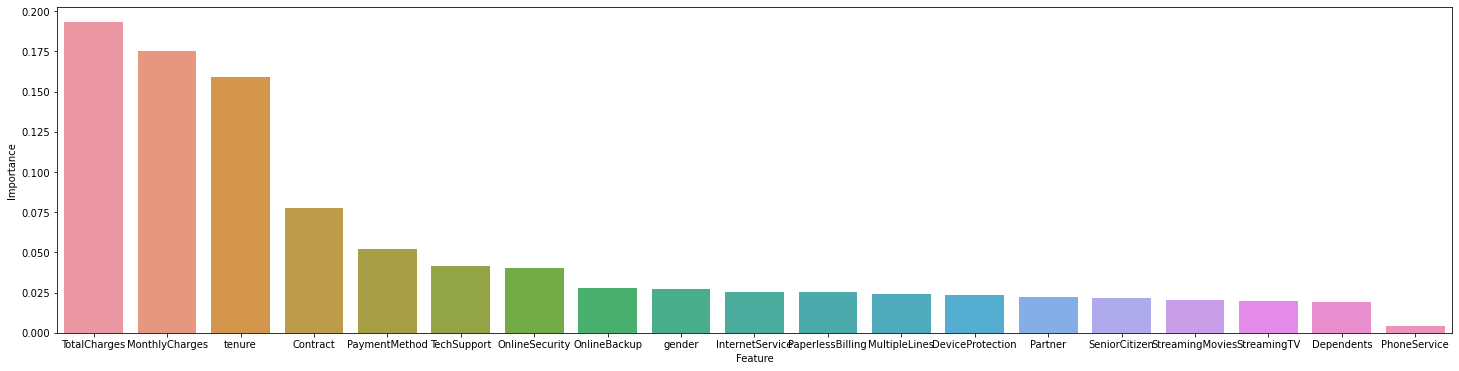

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,6))
# make barplot and sort bars
sns.barplot(x='Feature',y="Importance",data=df, order=df.sort_values('Importance', ascending=False).Feature)

In [ ]:
classifier1.predict(X_test1)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
classifier1.predict_proba(X_test1)

array([[0.743     , 0.257     ],
       [0.878     , 0.122     ],
       [0.90733333, 0.09266667],
       ...,
       [0.256     , 0.744     ],
       [0.928     , 0.072     ],
       [0.596     , 0.404     ]])

In [ ]:
'''
         0             1
       [0.743     , 0.257     ],
       [0.878     , 0.122     ],
       [0.90733333, 0.09266667],
       ...,
       [0.256     , 0.744     ],
       [0.928     , 0.072     ],
       [0.596     , 0.404     ]])
'''

In [ ]:
#predict proba

In [ ]:
proba_valid = classifier1.predict_proba(X_test1)[:, 1]

In [ ]:
proba_valid#probablibities of getting target as 1

array([0.257     , 0.122     , 0.09266667, ..., 0.744     , 0.072     ,
       0.404     ])

In [ ]:
#roc
#It tells how much the model is capable of distinguishing between classes. 
#Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 
#By analogy, the Higher the AUC, the better the model is at distinguishing between customers churned out or not.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test1, proba_valid)

0.8276991922135021

In [ ]:
  0    1   2
0 345 738 322
1 829 389 90
2 2    33  90

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.62      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
(0.83+0.62)/2

0.725

In [ ]:
(0.89+0.49)/2

0.69

In [ ]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives. 
#Thus, for all the customers who actually have churned out, recall tells us how many we correctly identified as a churned out customers.

#precision of class 0 = TP of class 0/total number of object 
#What is the Precision for our model? Yes, it is 0.843 or, when it predicts that a customer has churned out, 
#it is correct around 84% of the time.
#precision of class 1 = TP of class 1/total number of object 

#macro average = (precision of class 0 + precision of class 1)/2 

#weighted average is precision of all classes merge together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1) 

#F1-score is a measure of a model's accuracy on a dataset
#a good F1 score means that you have low false positives and low false negatives, 
#Accuracy is used when the True Positives and True negatives are more important while 
#F1-score is used when the False Negatives and False Positives are crucial.

#Support is the number of actual occurrences of the class in the specified dataset.